In [12]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

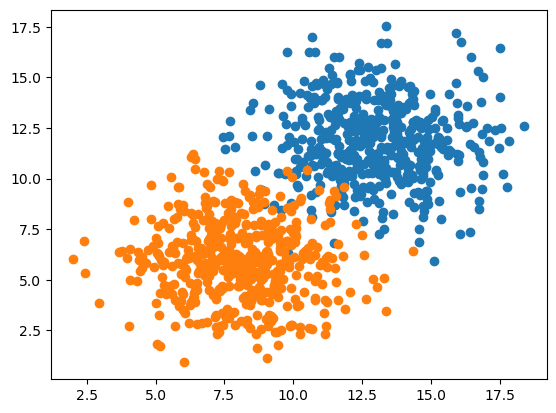

In [13]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [34]:
model = Sequential()
model.add(Dense(units = 1,input_shape=(2,),activation='sigmoid'))
adam = Adam(learning_rate=0.1)
model.compile(adam ,loss='binary_crossentropy',metrics=['accuracy'])
h=model.fit(x=X,y=y,verbose=1,batch_size=50,epochs=1000,shuffle='true')

Epoch 1/1000


c:\Users\faeiqkhan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6064 - loss: 1.4856   
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6977 - loss: 0.9290 
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7112 - loss: 0.6827 
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 0.4516 
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8807 - loss: 0.3260 
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9371 - loss: 0.2744 
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9508 - loss: 0.2650 
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9447 - loss: 0.2343 
Epoch 9/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.2207 
Epoch 10/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - loss: 0.1937 
Epoch 11/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9782 - loss: 0.1695 
Epoch 12/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

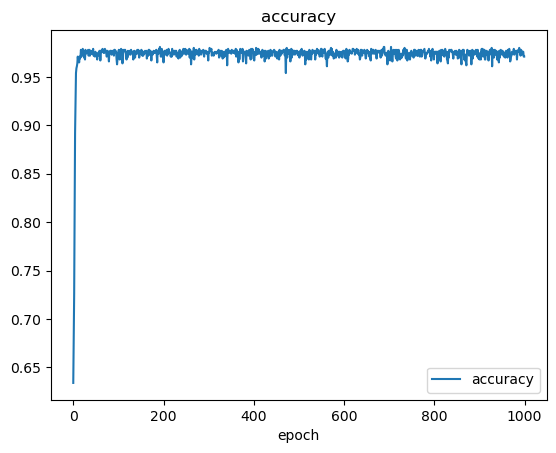

In [35]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])


In [39]:
def plot_decision_boundary(X,y,model):
    x_span = np.linspace(min(X[:,0]) - 1,max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1,max(X[:,1]) + 1)
    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


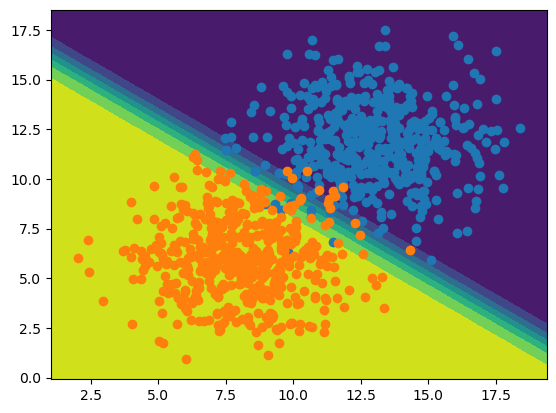

In [40]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction is [[0.99999225]]


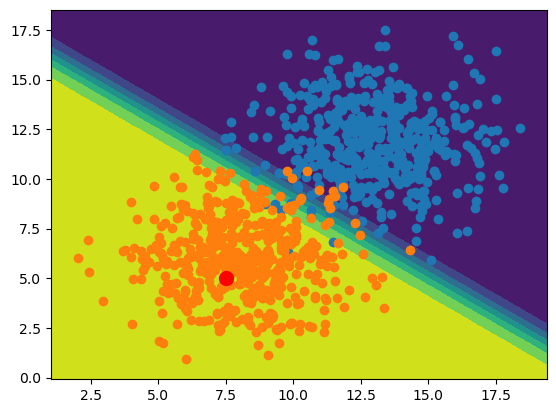

In [41]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point  = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker="o",markersize=10,color="red")
print("Prediction is",prediction)